In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [2]:
# Load the heart disease dataset from the CSV file into a pandas DataFrame
df = pd.read_csv('heart.csv')

In [3]:
# Display the first five rows of the DataFrame to preview the data
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
# Display the last five rows of the DataFrame to preview the data
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [5]:
# Display the shape (number of rows, number of columns) of the DataFrame
df.shape

(1025, 14)

In [22]:
# Retrieve a list containing the names of all columns in the DataFrame
df.columns.tolist()

['age',
 'sex',
 'cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal',
 'target']

In [7]:
# Display summary information about the DataFrame, including column names, data types, and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [8]:
# Check for missing values by counting the number of null (NaN) entries in each column
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [9]:
# Generate summary statistics for all numerical columns in the DataFrame
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


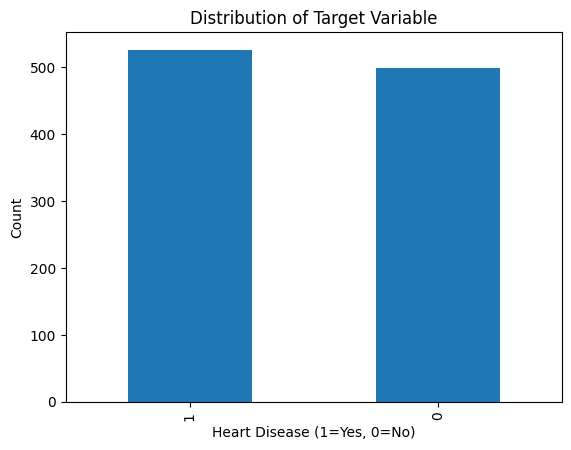

In [24]:
# Count the occurrences of each class (0 or 1) in the 'target' column and create a bar plot
df['target'].value_counts().plot(kind='bar')

# Set the title of the plot for better understanding
plt.title('Distribution of Target Variable')

# Label the x-axis to indicate what the classes represent (1 = heart disease, 0 = no heart disease)
plt.xlabel('Heart Disease (1=Yes, 0=No)')

# Label the y-axis to show the number of cases in each class
plt.ylabel('Count')

# Display the plot
plt.show()


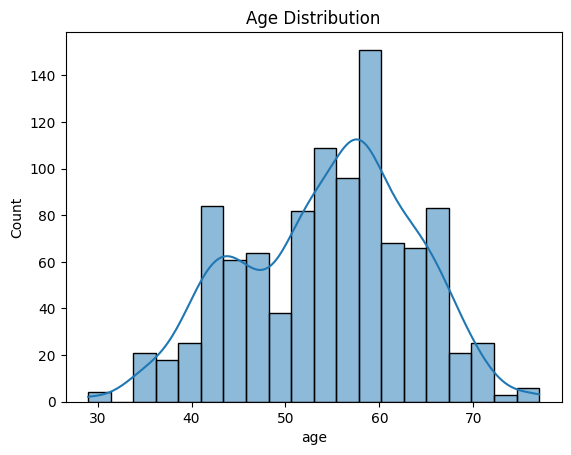

In [11]:
# Create a histogram of the 'age' column with 20 bins to show how patient ages are distributed
sns.histplot(df['age'], bins=20, kde=True)

# Add a title to the plot to describe what is being visualized
plt.title('Age Distribution')

# Display the histogram plot
plt.show()


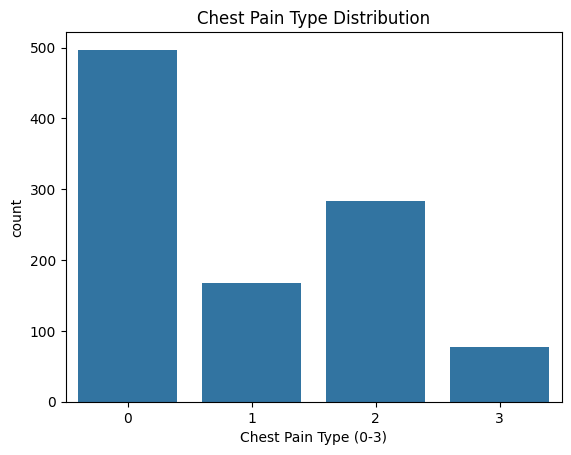

In [12]:
# Create a bar plot showing the count of each chest pain type (cp) in the dataset
sns.countplot(x='cp', data=df)

# Add a title to describe the chart
plt.title('Chest Pain Type Distribution')

# Label the x-axis to indicate the chest pain type categories (0 to 3)
plt.xlabel('Chest Pain Type (0-3)')

# Display the plot
plt.show()


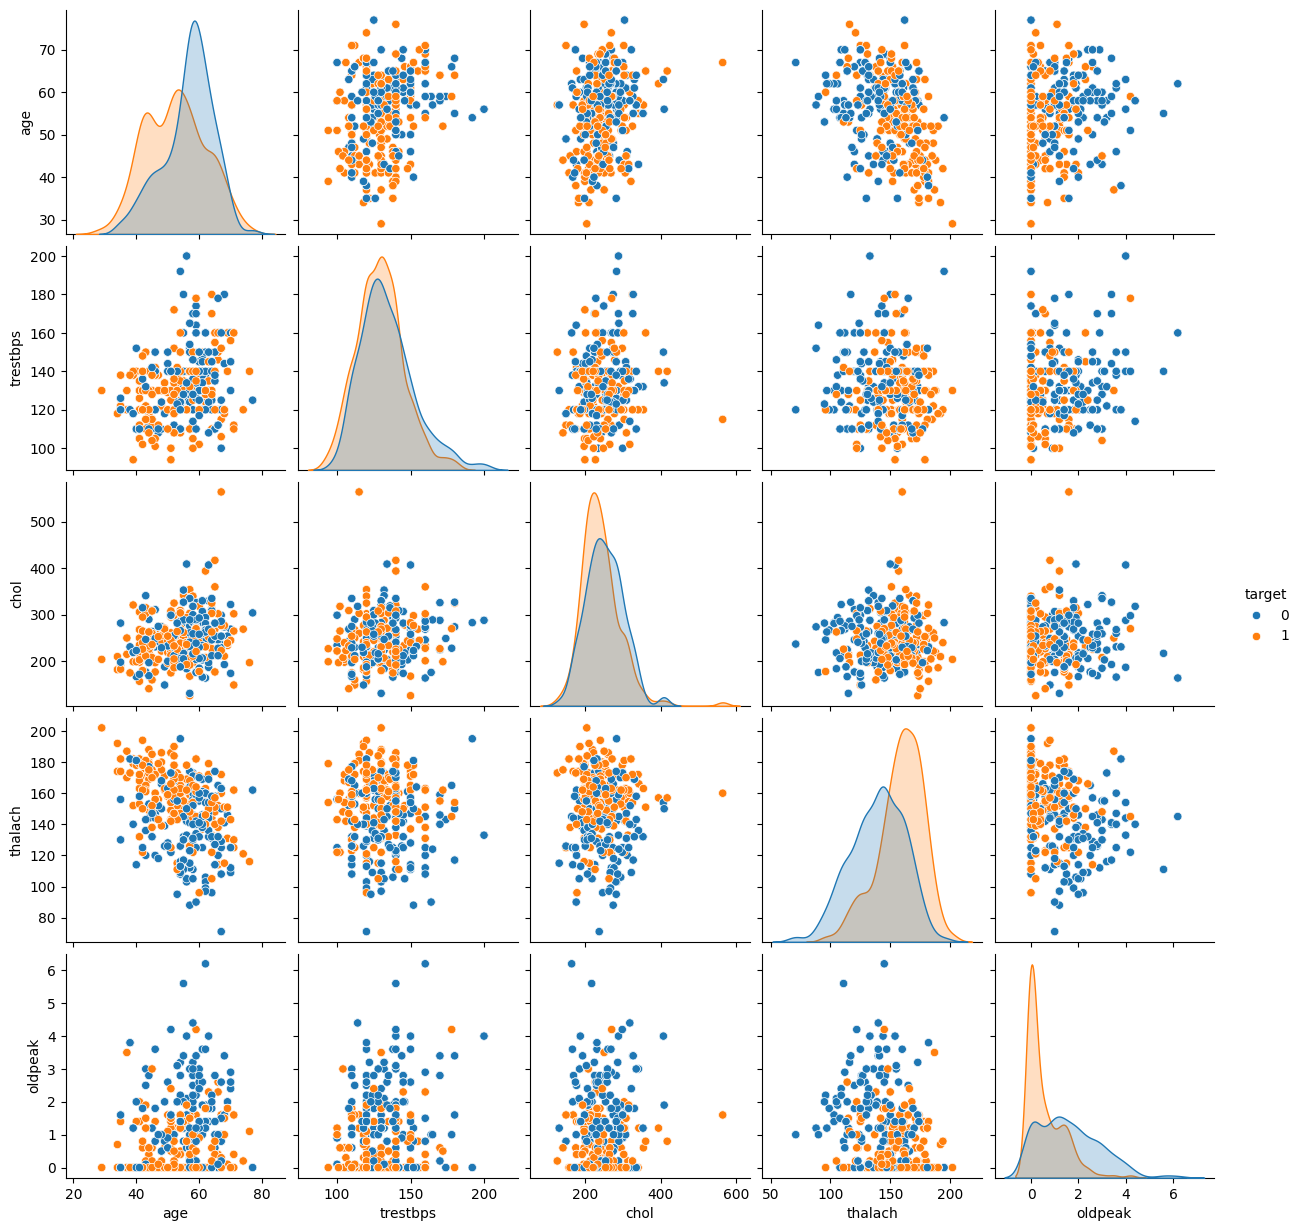

In [13]:
# Create a matrix of scatter plots and histograms to visualize pairwise relationships
# between selected numerical features, colored by the 'target' variable
sns.pairplot(df, vars=['age', 'trestbps', 'chol', 'thalach', 'oldpeak'], hue='target')

# Display the pairplot
plt.show()


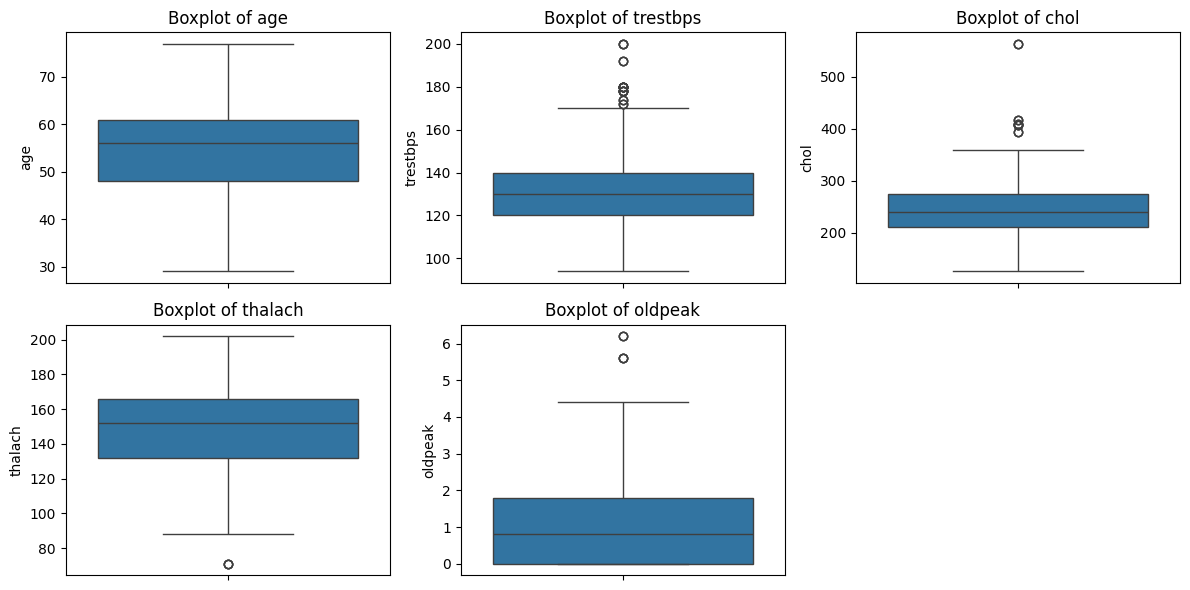

In [14]:
# Define a list of commonly analyzed numeric features to check for outliers
numeric_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# Set the overall figure size for the group of subplots (width=12, height=6 inches)
plt.figure(figsize=(12, 6))

# Loop through each numeric feature and create a boxplot in a subplot
for i, col in enumerate(numeric_features, 1):
    # Create a subplot in a 2-row, 3-column grid at position i
    plt.subplot(2, 3, i)

    # Create a boxplot for the current column to visualize its distribution and detect outliers
    sns.boxplot(y=df[col])

    # Set the title of the subplot to indicate which feature is being plotted
    plt.title(f'Boxplot of {col}')

# Adjust subplot layout to prevent overlapping of titles and axes
plt.tight_layout()

# Display all the boxplots
plt.show()

In [15]:
# Convert categorical columns ('cp', 'thal', 'slope') into dummy/indicator variables
# drop_first=True avoids multicollinearity by dropping the first category of each feature
df_encoded = pd.get_dummies(df, columns=['cp', 'thal', 'slope'], drop_first=True)

# Display the first five rows of the updated DataFrame with the new dummy variables
df_encoded.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,target,cp_1,cp_2,cp_3,thal_1,thal_2,thal_3,slope_1,slope_2
0,52,1,125,212,0,1,168,0,1.0,2,0,False,False,False,False,False,True,False,True
1,53,1,140,203,1,0,155,1,3.1,0,0,False,False,False,False,False,True,False,False
2,70,1,145,174,0,1,125,1,2.6,0,0,False,False,False,False,False,True,False,False
3,61,1,148,203,0,1,161,0,0.0,1,0,False,False,False,False,False,True,False,True
4,62,0,138,294,1,1,106,0,1.9,3,0,False,False,False,False,True,False,True,False


In [16]:
# Create the feature matrix (X) by dropping the 'target' column from the encoded DataFrame
# These are the input variables used to train the model
X = df_encoded.drop('target', axis=1)

# Create the target vector (y) by selecting the 'target' column
# This is the output variable the model is trying to predict (1 = heart disease, 0 = no heart disease)
y = df_encoded['target']


In [17]:
# Split the dataset into training and testing sets
# 80% of the data is used for training, and 20% is used for testing
# random_state=42 ensures reproducibility of the split
# stratify=y ensures that the proportion of classes in 'y' (target) is maintained in both sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

# Print the shape of the training feature set (rows, columns)
print(X_train.shape)

# Print the shape of the testing feature set (rows, columns)
print(X_test.shape)


(820, 18)
(205, 18)


In [25]:
# Initialize the Logistic Regression model with a maximum of 5000 iterations
# random_state=42 ensures reproducibility of the results
logreg = LogisticRegression(max_iter=5000, random_state=42)

# Fit the Logistic Regression model to the training data (learn the relationship between features and target)
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=5000, random_state=42)

In [20]:
# Predict outcomes on test data
y_pred = logreg.predict(X_test)


Accuracy: 0.85


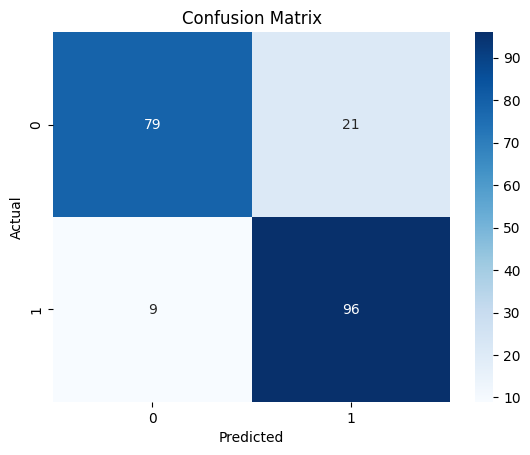

              precision    recall  f1-score   support

           0       0.90      0.79      0.84       100
           1       0.82      0.91      0.86       105

    accuracy                           0.85       205
   macro avg       0.86      0.85      0.85       205
weighted avg       0.86      0.85      0.85       205



In [27]:
# Calculate the accuracy of the model by comparing predicted and actual labels
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy as a percentage with two decimal places
print(f'Accuracy: {accuracy:.2f}')

# Generate a confusion matrix to evaluate model performance across all classification outcomes
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix using a heatmap for easier interpretation
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')

# Label the x-axis with 'Predicted' class values
plt.xlabel('Predicted')

# Label the y-axis with 'Actual' class values
plt.ylabel('Actual')

# Add a title to the heatmap
plt.title('Confusion Matrix')

# Display the plot
plt.show()

# Print detailed classification metrics: precision, recall, f1-score, and support for each class
print(classification_report(y_test, y_pred))
